In [1]:
pip install chart_studio

In [2]:
pip install plotly

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [4]:
data=pd.read_csv('stock-price-data.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
data.tail(11)

,Date,Open,High,Low,Close,Adj Close,Volume
998,2022-01-21,400.429993,409.149994,379.989990,397.500000,397.500000,58904300
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [6]:
data.shape

(1009, 7)

In [7]:
data.index

RangeIndex(start=0, stop=1009, step=1)

In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [10]:
data.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


In [11]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
data['Date']=pd.to_datetime(data['Date'])

In [13]:
print(f'Dataframe contains stock prices between {data.Date.min()} {data.Date.min()}')
print(f'Total days = {(data.Date.max()-data.Date.min()).days} days')


Dataframe contains stock prices between 2018-02-05 00:00:00 2018-02-05 00:00:00
Total days = 1460 days


<Axes: >

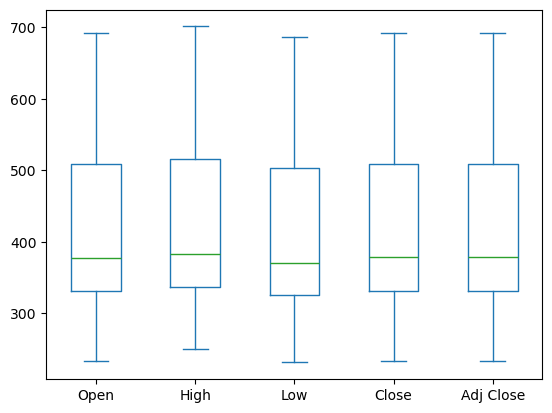

In [14]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [15]:
layout=go.Layout(
    title='Stock Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='red'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='red'
        )
    )
)

data_data=[{'x':data['Date'],'y':data['Close']}]
pllot=go.Figure(data=data_data,layout=layout)


C:\Users\DEEKSHITH\Downloads\New folder\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



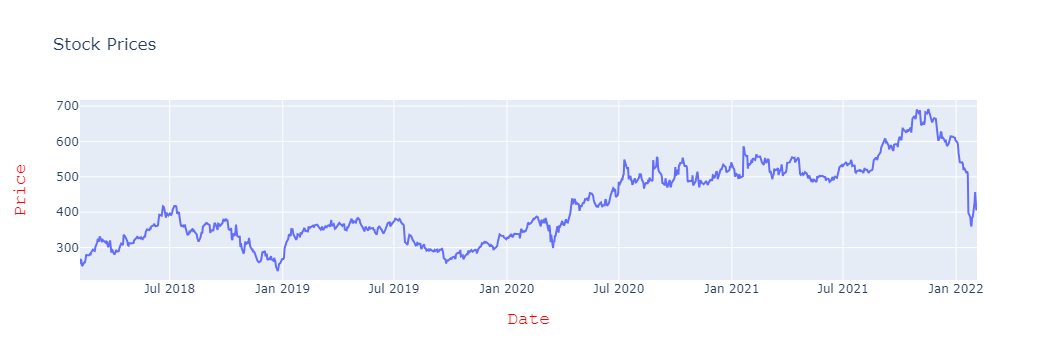

In [16]:
iplot(pllot)

In [17]:
pip install scikit-learn


In [18]:
#building the regression model
from sklearn.model_selection import train_test_split

#for processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [27]:
#split the dats into train and test sets
X=np.array(data.index).reshape(-1,1)
Y=data['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [20]:
scaler = StandardScaler().fit(X_train)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [23]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
data_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=data_data, layout=layout)
    
    
    

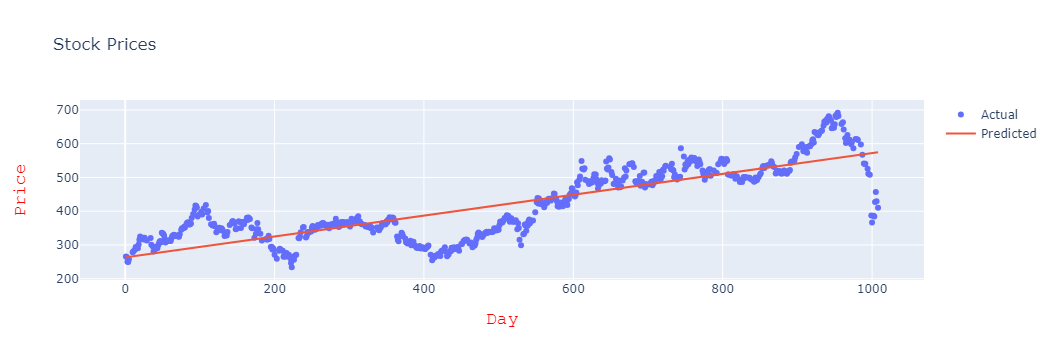

In [24]:
iplot(plot2)

In [28]:
#calculating scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944174	0.7261648669848495
MSE       3403.0038800025172	3460.988580958064

